# Temel Bileşen Analizi

Bu ısınma alıştırması, **Temel Bileşen Analizi**'nin nasıl çalıştığına dair sezgisel bir fikir edinmenize yardımcı olacaktır. 

## (1) Veri Oluşturma

**100 gözlem** ve **birbiriyle ilişkili (korelasyonlu) 2 özellik** içeren bir veri seti istiyoruz.

👇 Verinizi oluşturmak için aşağıdaki hücreyi çalıştırın  
💡 İki özellik arasındaki (yüksek) korelasyona dikkat edin.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 100 gözlem ve 2 ilişkili özellik içeren bir veri kümesi oluşturun.
seed = np.random.RandomState(42)
feature_1 = seed.normal(5, 1, 100)
feature_2 = .7 * feature_1 + seed.normal(0, .5, 100)
X = np.array([feature_1, feature_2]).T
X = pd.DataFrame(X)

X.corr().round(3)

,0,1
0,1.00,0.77
1,0.77,1.00


❓ İki özelliğinizi birbirine göre dağılım grafiği çizin.

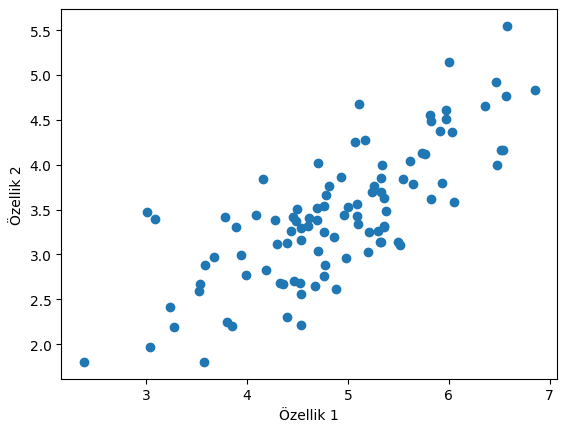

In [3]:
plt.scatter(X[0], X[1])
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

☝️ Özellikler arasındaki **pozitif korelasyonu** tespit edebilirsiniz.

Gözlemlerimiz tek bir çizgi boyunca sıkışmış durumda; aralarındaki farkları ayırt etmek kolay değil.

💡 PCA, bu korelasyonu ortadan kaldıran yönleri (diğer adıyla **“principal components” – temel bileşenler**) bulmamıza yardımcı olacaktır.

## (2) Temel Bileşenler

👉 `sklearn`'den `PCA`'yı içe aktarın ve `n_components=2` ile bir model oluşturun

❓Bunu `X`'inize uyarlayın ve `pca`'ya atayın

In [4]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Eğitilmiş `PCA` nesnesinin üç özniteliğine odaklanalım:

* `pca.components_`: Varyansın en iyi şekilde açıklandığı yönleri gösteren özvektörler kümesi; yani **maksimum varyans yönleri** (konvansiyon gereği birim uzunluğa normalize edilmişlerdir).

* `pca.explained_variance_`:  
  $Var(\text{Temel Bileşen})$, her bir temel bileşenin açıkladığı varyans (kovaryans matrisi  
  $ \Sigma = \frac{1}{n - 1} X^T X $’in özdeğerleri ile verilir).

* `pca.explained_variance_ratio_`:  
  $ \frac{Var(\text{Temel Bileşen})}{\text{Toplam Varyans}}$, her bir temel bileşenin toplam varyansın ne kadarını açıkladığını gösterir.

In [5]:
# Her bir ana bileşenin vektör koordinatları
pca.components_

array([[ 0.79286897,  0.60939216],
       [-0.60939216,  0.79286897]])

In [6]:
# Her bir ana bileşen için açıklanan varyans
# Önem sırasına göre azalan şekilde sıralanmıştır
pca.explained_variance_

array([1.2231014 , 0.15046893])

In [7]:
# Her bir ana bileşen için açıklanan varyans oranı
# Önem sırasına göre azalan şekilde sıralanmıştır

# Her bir ana bileşen için açıklanan varyans
# verilerin toplam varyansına bölünmüştür
pca.explained_variance_ratio_

array([0.89045415, 0.10954585])

👇 Aşağıdaki hücreyi çalıştırarak iki ana bileşeninizi görselleştirin.

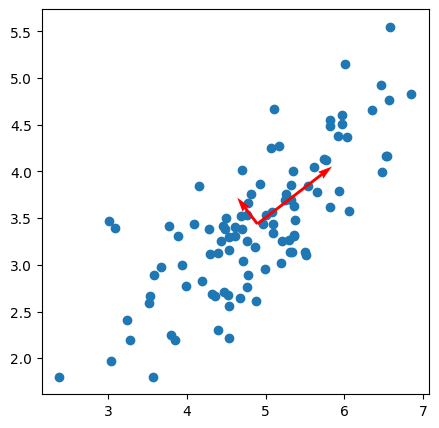

In [8]:
plt.figure(figsize=(5,5))

plt.scatter(X[0], X[1])

for (length, vector) in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) # Aynı “birimleri” karşılaştırmak için uzunluklarının karekökü
    plt.quiver(*X.mean(axis=0), *v, units='xy', scale=1, color='r')

💡 Vektörün uzunluğu, veri kümesinin bu eksene yansıtıldığında standart sapmasının bir ölçüsüdür!

💡 Daha sonra bu yönleri (bu “ana bileşenleri”) kullanarak gözlemlerimizin davranışlarının çoğunu “açıklayabiliriz” - gözlemler arasındaki farkların çoğu bu eksenler boyunca gerçekleşir. 

## (3) PCA uygulayın

Bu bileşenleri kullanarak veri setimizdeki her bir örneği, maksimum varyans yönlerine projekte edebiliriz.

❓ ***Sorular*** ❓

1. `pca` nesnesinin `transform` metodunu `X` üzerinde kullanın ve sonucu `X_transformed` değişkenine kaydedin.  
2. `X_transformed` içindeki projekte edilmiş özellikleri birbirlerine karşı grafiğe dökün.  
3. `X_transformed` içindeki dönüştürülmüş özellikler arasındaki korelasyonu hesaplayın.

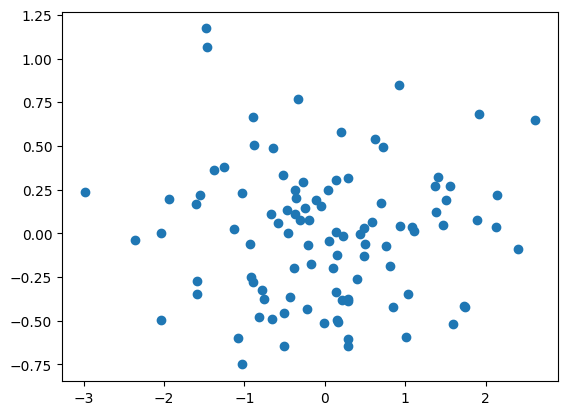

In [10]:
X_transformed=pca.transform(X)
plt.scatter(X_transformed[:,0],X_transformed[:,1])

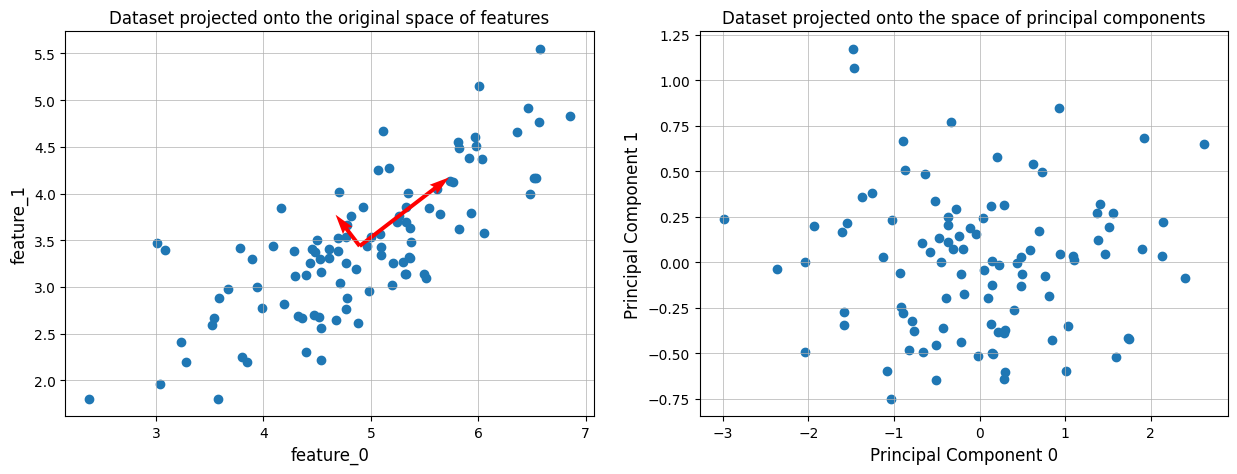

In [13]:
X_transformed = pca.transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].scatter(X[0], X[1])
ax[0].set_title("Dataset projected onto the original space of features",
               fontsize = 12)
ax[0].set_xlabel('feature_0', fontsize = 12)
ax[0].set_ylabel('feature_1', fontsize = 12)
ax[0].grid(axis="x",linewidth=0.5)
ax[0].grid(axis="y",linewidth=0.5)

for (length, vector) in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) # Square root of their lenghts to compare same "units"
    ax[0].quiver(*X.mean(axis=0), *v, units='xy', scale=1, color='r')

###############################################
# After the PCA : PC_0 vs. PC_1    #
###############################################

ax[1].scatter(X_transformed[:, 0], X_transformed[:, 1]);
ax[1].set_title("Dataset projected onto the space of principal components",
               fontsize = 12)

ax[1].set_xlabel('Principal Component 0', fontsize = 12)
ax[1].set_ylabel('Principal Component 1', fontsize = 12)
ax[1].grid(axis="x",linewidth=0.5)
ax[1].grid(axis="y",linewidth=0.5)

plt.show();


In [ ]:
# SENİN KODUN BURAYA

☝️ Dönüştürülmüş özellikleriniz arasında hiçbir korelasyon yoktur.  

Bu, gözlemler arasında davranışları incelemek daha kolay hale getirir, çünkü artık tek bir çizgi üzerinde toplanmış değildirler.

🏁 **Not defterinizi PUSH etmeyi unutmayın.**  

Günün görevlerini yerine getirin ve zamanınız olursa buraya geri dönün 😉

## (Opsiyonel) Scaling'in küçük bir yardımıyla

`PCA` ile elde edilen **projeksiyonların**, aslında başlangıçtaki `X` matrisi ile *transpoze edilmiş* bileşenlerin (yani `pca.components_` ile elde edilen özvektörlerin) noktasal çarpımından ibaret olduğunu unutmayın.

👉 Noktasal çarpımı kullanarak projekte edilmiş değerleri **manuel olarak** hesaplayın:  
$X \cdot PC^T$

❓ `np.allclose` kullanarak, elde ettiğiniz `X_transformed` ile hesapladığınız  $X \cdot PC^T$ sonucunun **aynı olup olmadığını** kontrol edin.

In [14]:
PC = pca.components_.T

np.allclose(X_transformed, np.dot(X, PC))

False

Eşit değil 😱  

`sklearn`'in `PCA`'sı indirgemeyi uyguladığında, bunu *merkezlenmiş* ancak *ölçeklenmemiş* bir `X` üzerinde yapar.

Bu, `PCA().transform(X)`'in aslında `np.dot(X - X.mean(axis=0), PC)` ile eşdeğer olduğu anlamına gelir.

In [15]:
np.allclose(X_transformed, np.dot(X - X.mean(axis=0), PC))

True

Bu nedenle, `PCA` kullanırken, verilerinizi öncelikle ölçeklendirmenizi, daha doğrusu standartlaştırmanızı ve böylece verilerin merkezlenmesini öneririz.

Bu şekilde, `PCA.transform()` kullanmak veya ana bileşenlerle nokta çarpımı yapmak eşdeğer olacaktır.